# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

c:\Users\jonas.klimt\Documents\Master\Q2(2)\ABM\base_model_mesa\sen1211\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


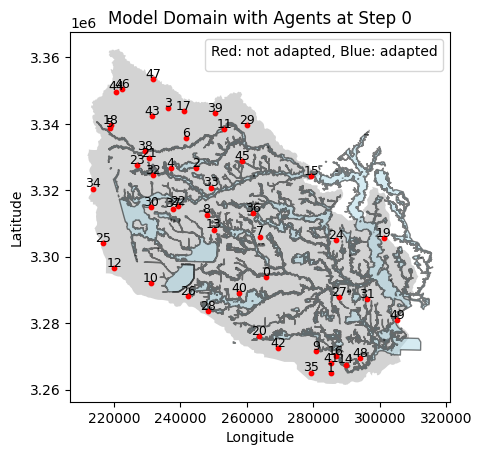

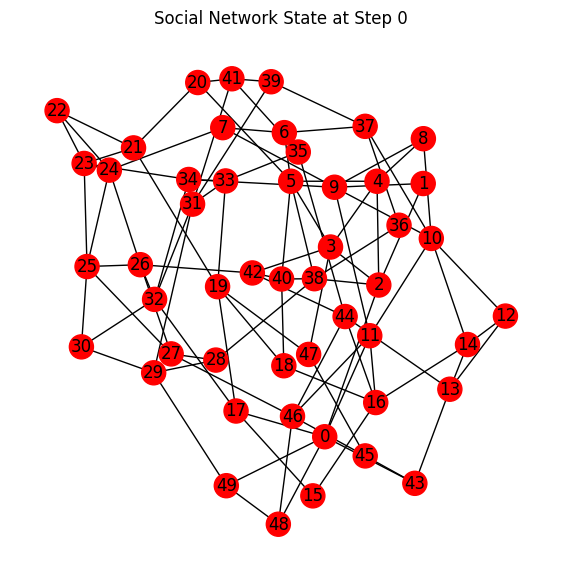

<Figure size 1000x600 with 0 Axes>

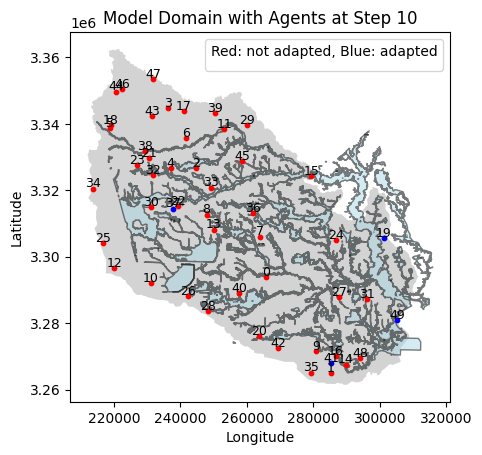

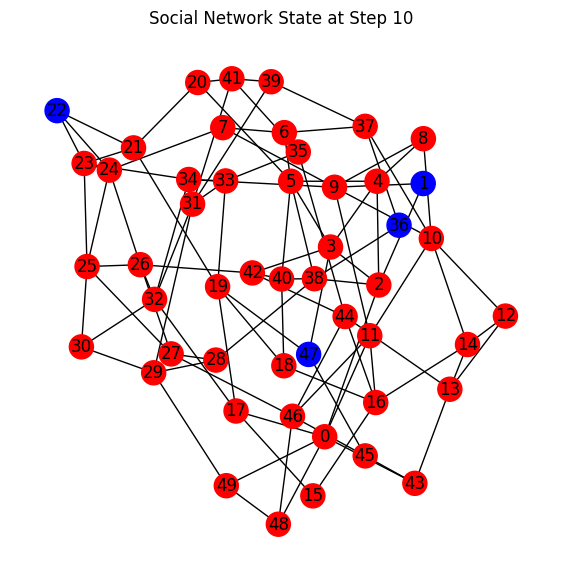

<Figure size 1000x600 with 0 Axes>

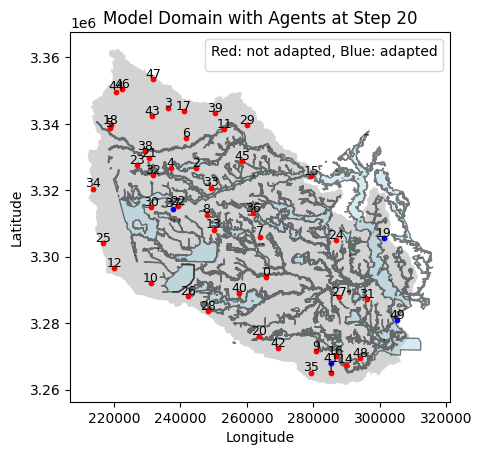

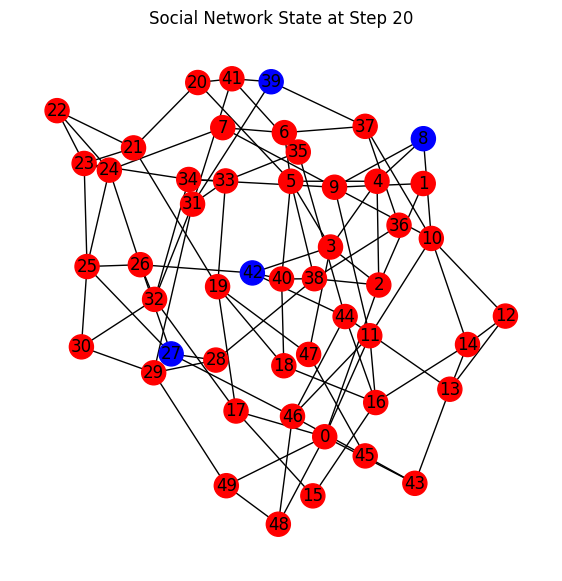

<Figure size 1000x600 with 0 Axes>

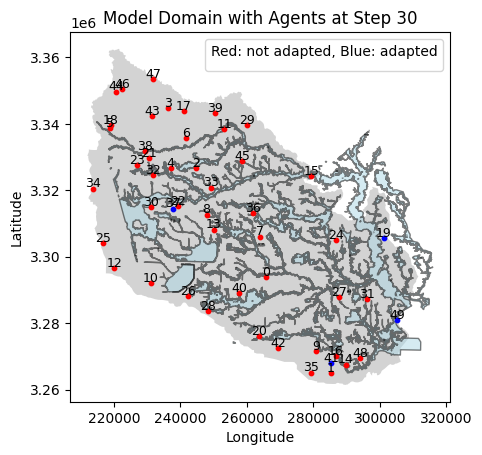

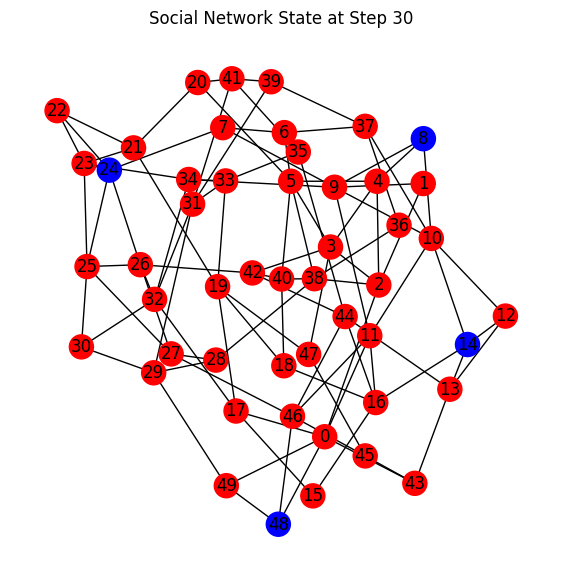

<Figure size 1000x600 with 0 Axes>

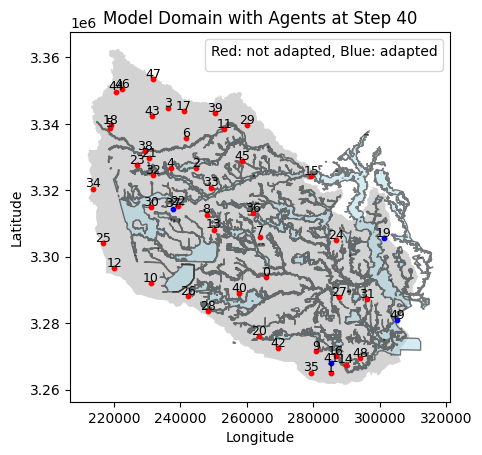

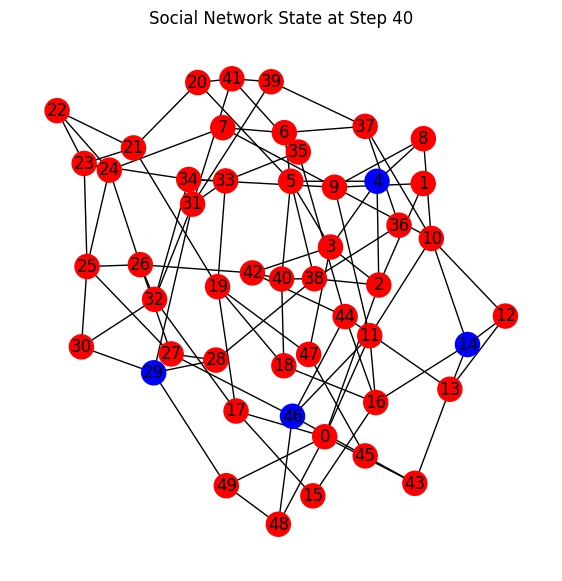

<Figure size 1000x600 with 0 Axes>

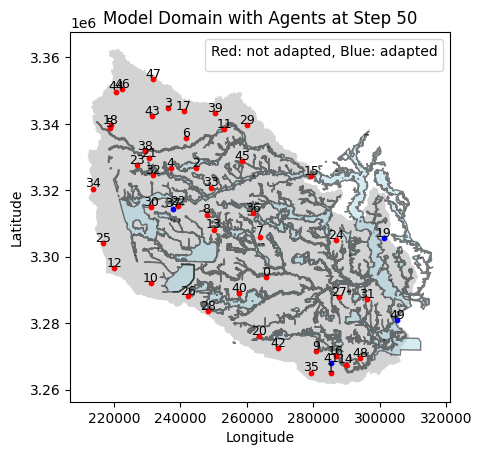

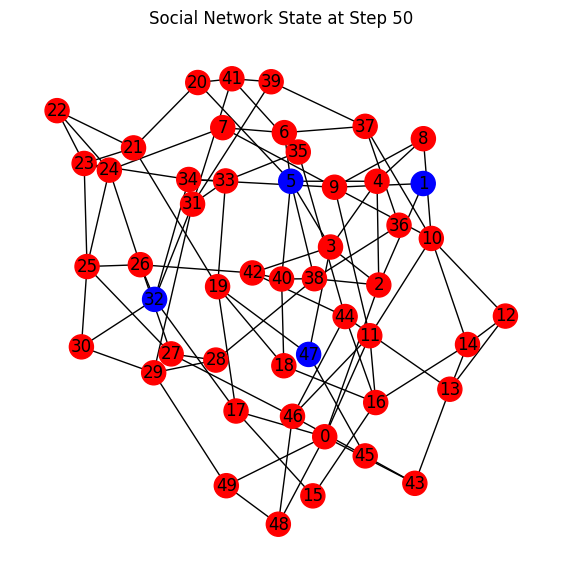

<Figure size 1000x600 with 0 Axes>

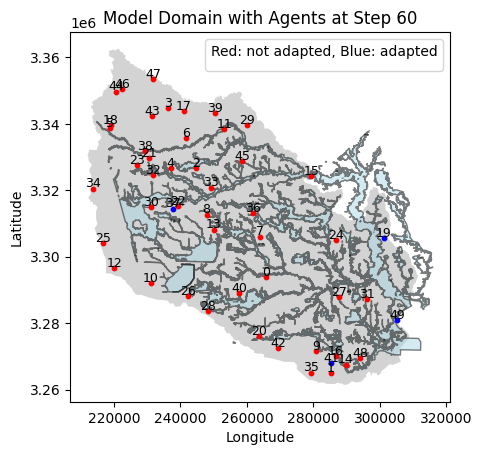

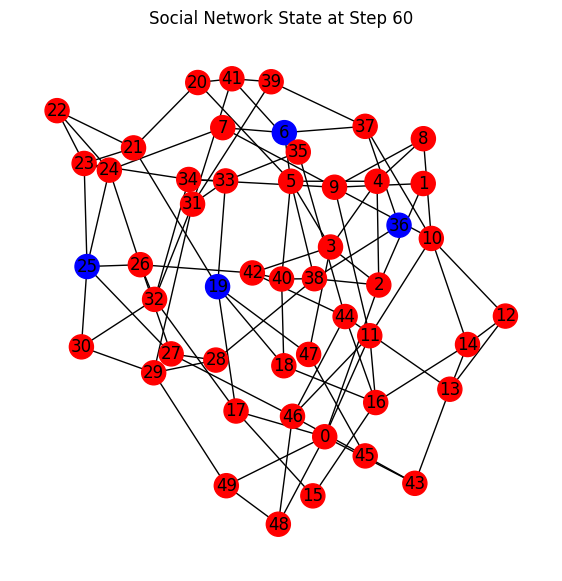

<Figure size 1000x600 with 0 Axes>

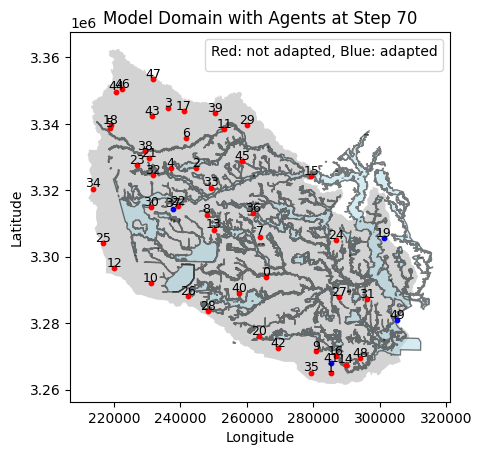

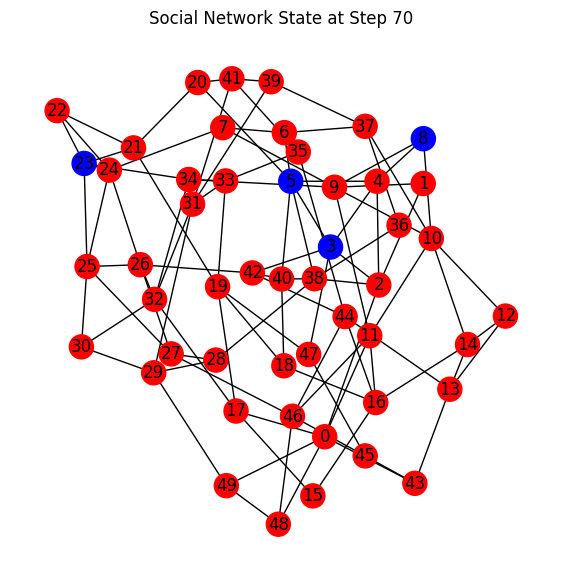

<Figure size 1000x600 with 0 Axes>

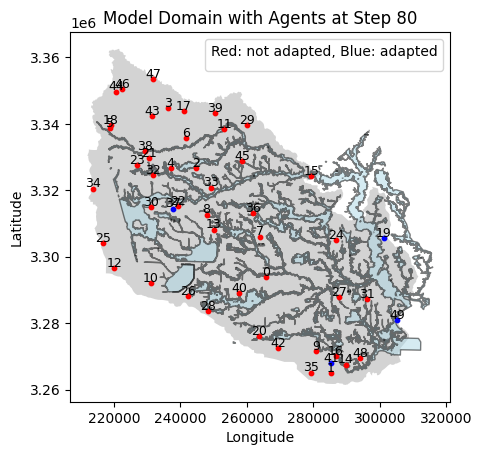

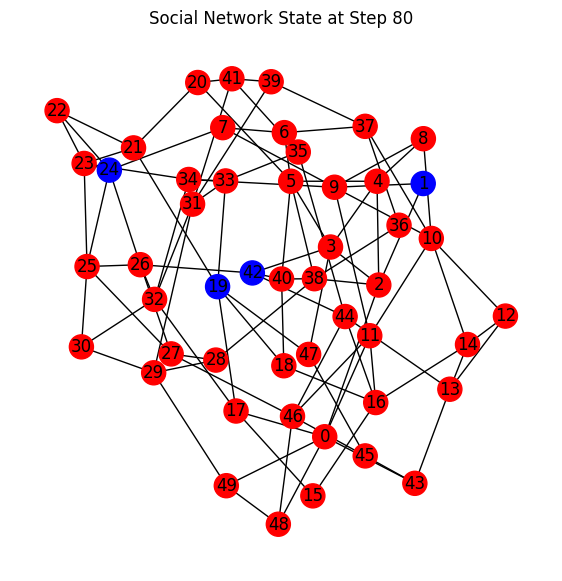

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", time_of_flooding =70, subsidie_level=0, information_bias=0.0) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 80 steps and generate plots every 5 steps.
for step in range(80):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 10 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

# Fix convergence of Risk Perception

FloodDepthEstimated  \
Step AgentID                                         
0    0                                [0, 0, 0, 0]   
     1        [2.3549356, 0.8718662, 1.0537825, 0]   
     2              [0.29060364, 0, 0.16220474, 0]   
     3                       [0.15525055, 0, 0, 0]   
     4                                [0, 0, 0, 0]   
...                                            ...   
79   27                      [0.47110987, 0, 0, 0]   
     8                       [0.32959747, 0, 0, 0]   
     29                               [0, 0, 0, 0]   
     17       [5.0148697, 2.3312073, 2.7954826, 0]   
     15                       [4.0771675, 0, 0, 0]   

                                           FloodDamageEstimated  \
Step AgentID                                                      
0    0                                             [0, 0, 0, 0]   
     1        [79784.72397412655, 62435.89742066275, 65744.6...   
     2             [43253.0191245895, 0, 33072.077593763155, 0]   
     3                            [32306.995752460778, 0, 0, 0]   
     4                                             [0, 0, 0, 0]   
...                                                         ...   
79   27                            [51688.48745580164, 0, 0, 0]   
     8                             [45451.44024628016, 0, 0, 0]   
     29                                            [0, 0, 0, 0]   
     17       [92982.63385031276, 79607.90440221429, 82778.9...   
     15                            [89368.32782142704, 0, 0, 0]   

              ExpectedUtilityAdaption  ExpectedUtilityNoAdaption  \
Step AgentID                                                       
0    0                   0.000000e+00               0.000000e+00   
     1                   0.000000e+00               0.000000e+00   
     2                   0.000000e+00               0.000000e+00   
     3                   0.000000e+00               0.000000e+00   
     4                   0.000000e+00               0.000000e+00   
...                               ...                        ...   
79   27                 -6.065423e+06              -1.616396e+06   
     8                  -5.465064e+06              -1.786725e+06   
     29                 -3.698960e+06               0.000000e+00   
     17                 -1.134860e+07              -7.662964e+06   
     15                 -5.255624e+06              -1.685131e+06   

              RiskPerception  PriorRiskPerception  FloodDepthActual  \
Step AgentID                                                          
0    0              0.557258                  NaN          0.000000   
     1              0.610346                  NaN          0.000000   
     2              0.724305                  NaN          0.000000   
     3              1.000000                  NaN          0.000000   
     4              0.316267                  NaN          0.000000   
...                      ...                  ...               ...   
79   27             0.833333             0.833333          0.000000   
     8              0.833333             0.833333          0.000000   
     29             0.833333             0.833333          0.000000   
     17             0.833333             0.833333          2.795483   
     15             0.833333             0.833333          0.000000   

              FloodDamageActual  IsAdapted  AdaptedAt  FriendsCount  \
Step AgentID                                                          
0    0                 0.000000      False        NaN             6   
     1                 0.000000      False        NaN             2   
     2                 0.000000      False        NaN             5   
     3                 0.000000      False        NaN             5   
     4                 0.000000      False        NaN             4   
...                         ...        ...        ...           ...   
79   27                0.000000      False        NaN             4   
     8  

In [3]:
last_step_agent_data = agent_data.xs(79, level="Step")
last_step_agent_data

,FloodDepthEstimated,FloodDamageEstimated,ExpectedUtilityAdaption,ExpectedUtilityNoAdaption,RiskPerception,PriorRiskPerception,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptedAt,FriendsCount,Location,Savings,IncomeCategory
AgentID,,,,,,,,,,,,,,
38,"[5.530205, 3.3812141, 3.865345, 0]","[94690.52578174119, 86100.3806304052, 88436.80...",-1.189802e+07,-8.872164e+06,0.833333,0.833333,3.865345,88436.809430,False,NaN,5,POINT (229312.77756631115 3331880.919315323),44333.646893,middle
36,"[0.2500534, 0, 0, 0]","[40629.02991491002, 0, 0, 0]",-5.251882e+06,-1.569398e+06,0.833333,0.833333,0.000000,0.000000,False,NaN,2,POINT (261936.17192053664 3313174.6962984074),46112.631468,middle
2,"[0.29060364, 0, 0.16220474, 0]","[43253.0191245895, 0, 33072.077593763155, 0]",-1.008123e+07,-4.486587e+06,0.833333,0.833333,0.162205,33072.077594,False,NaN,5,POINT (244684.09072453895 3326611.8928126753),285959.340648,high
25,"[0.22306442, 0, 0, 0]","[38634.855260378936, 0, 0, 0]",-5.341514e+06,-1.678177e+06,0.833333,0.833333,0.000000,0.000000,False,NaN,5,POINT (216571.40963016739 3304222.548937143),44685.098290,middle
4,"[0, 0, 0, 0]","[0, 0, 0, 0]",-3.806278e+06,0.000000e+00,0.833333,0.833333,0.000000,0.000000,False,NaN,4,POINT (237074.3837405823 3326732.5936496486),18513.190867,middle
46,"[0, 0, 0, 0]","[0, 0, 0, 0]",-3.787419e+06,0.000000e+00,0.833333,0.833333,0.000000,0.000000,False,NaN,5,POINT (222516.4215096201 3350411.824832697),190463.385053,high
22,"[0.3599739, 0.23576736, 0.2511711, 0]","[46990.70368455769, 39601.87657240117, 40706.8...",-1.330404e+07,-7.895704e+06,0.833333,0.833333,0.251171,40706.899946,False,NaN,3,POINT (239232.02189080522 3315221.3474481353),94597.742460,high
45,"[0, 0, 0, 0]","[0, 0, 0, 0]",-3.773786e+06,0.000000e+00,0.833333,0.833333,0.000000,0.000000,False,NaN,3,POINT (258554.3626606493 3328913.9894818715),55138.138379,middle
40,"[0.93842506, 0.37080574, 0.46248245, 0]","[63720.377320150335, 47508.33620147422, 51365....",-1.298314e+07,-8.849512e+06,0.833333,0.833333,0.462482,51365.779255,False,NaN,4,POINT (257663.59407203464 3288982.5698892614),81490.732717,high


In [4]:
last_step_agent_data = agent_data.xs(10, level="Step")
last_step_agent_data

,FloodDepthEstimated,FloodDamageEstimated,ExpectedUtilityAdaption,ExpectedUtilityNoAdaption,RiskPerception,PriorRiskPerception,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptedAt,FriendsCount,Location,Savings,IncomeCategory
AgentID,,,,,,,,,,,,,,
42,"[0.28799248, 0, 0, 0]","[43095.42674959444, 0, 0, 0]",-6.265422e+05,-1.931390e+05,0.833329,0.833323,0.0,0.0,False,NaN,4,POINT (269337.82666617865 3272567.461184404),67511.654518,middle
49,"[2.297165, 1.1955643, 1.1955643, 0]","[79351.05803309595, 67948.67493170452, 67948.6...",-1.140744e+06,-9.051505e+05,0.833330,0.833318,0.0,0.0,True,2.0,3,POINT (305145.48797705356 3280910.0432830937),227969.419048,high
39,"[0, 0, 0, 0]","[0, 0, 0, 0]",-5.819881e+05,0.000000e+00,0.833327,0.833325,0.0,0.0,False,NaN,3,POINT (250388.29465899084 3343202.8546112627),91612.423041,high
12,"[0.6365013, 0.3425598, 0.37026978, 0]","[56942.11676400832, 46124.94493352887, 47483.0...",-1.154304e+06,-7.596179e+05,0.833329,0.833323,0.0,0.0,False,NaN,3,POINT (220130.01434499625 3296698.6287486213),96350.338445,high
25,"[0.22306442, 0, 0, 0]","[38634.855260378936, 0, 0, 0]",-6.076107e+05,-2.515154e+05,0.833329,0.833327,0.0,0.0,False,NaN,5,POINT (216571.40963016739 3304222.548937143),50252.123909,middle
31,"[0.4153452, 0.39064693, 0.41265774, 0]","[49488.852771282276, 48418.45365913538, 49375....",-1.513239e+06,-1.108912e+06,0.833328,0.833317,0.0,0.0,False,NaN,5,POINT (296266.11251458514 3287190.9225639584),12330.744171,low
8,"[0.32959747, 0, 0, 0]","[45451.44024628016, 0, 0, 0]",-7.512536e+05,-1.941874e+05,0.833330,0.833319,0.0,0.0,False,NaN,3,POINT (247878.82089889603 3312687.6910950234),11625.162875,low
33,"[0.5800247, 0, 0, 0]","[55319.8076352426, 0, 0, 0]",-4.866333e+05,-1.601960e+05,0.833328,0.833317,0.0,0.0,False,NaN,4,POINT (249181.71708582842 3320808.2464063205),114511.725353,high
24,"[4.1826525, 0.58930016, 1.2716665, 0]","[89814.31032114368, 55596.80938191471, 69026.1...",-1.665237e+06,-1.106203e+06,0.833330,0.833326,0.0,0.0,False,NaN,5,POINT (286838.42015861365 3305061.540637648),1591.326536,low


In [5]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Total_adapted_households,GovernmentSpendings
0,0,0
1,2,0
2,3,0
3,4,0
4,4,0
...,...,...
75,4,0
76,4,0
77,4,0
78,4,0


In [6]:
# TODO: Key outputs of interest include the dynamics of regional residual damages (i.e., remaining damages
# after adaptation is taken), distribution of damages across the groups of actors and across agents
# within the same group (e.g., households with different incomes or with different risk perceptions),
# diffusion of adaptation over time